In [1]:
%matplotlib inline 

In [2]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# (further reading on mpl imports: http://bit.ly/197aGoq )

In [4]:
series1 = pd.Series([1,3,5,np.nan,7,9])
series1

0    1.0
1    3.0
2    5.0
3    NaN
4    7.0
5    9.0
dtype: float64

In [5]:
# by default (without specifying them explicitly), the index label is just an int
series1[5]

9.0

### DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

- dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Series

- another DataFrame


N.B.: there are other helper methods for constructing DataFrames from varying data types; [see the docs](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors) for more options.

In [11]:
# create a couple more Series
s2, s3 = pd.Series(np.random.randn(6)), pd.Series(np.random.randn(6))

In [9]:
s3

0    2.239897
1    0.271035
2    0.036532
3   -0.775716
4    0.673909
5    0.205494
dtype: float64

In [5]:
# combine multiple Series into a DataFrame with column labels
df_1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3})

df_1

,A,B,C
0,1.0,0.170390,-0.010633
1,3.0,-0.917595,-0.748547
2,5.0,-1.127053,-0.360921
3,NaN,-0.219737,0.372928
4,6.0,2.190400,1.921988
5,8.0,1.216908,1.173431


In [6]:
# when Series are different lengths, DataFrame fills in gaps with NaN
s4 = pd.Series(np.random.randn(8))  # whoaaaaaa this Series has extra entries!

df1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4})

df1 

,A,B,C,D
0,1.0,0.170390,-0.010633,0.700480
1,3.0,-0.917595,-0.748547,-1.007770
2,5.0,-1.127053,-0.360921,1.350810
3,NaN,-0.219737,0.372928,-0.364576
4,6.0,2.190400,1.921988,0.788077
5,8.0,1.216908,1.173431,1.174850
6,NaN,NaN,NaN,-0.756495
7,NaN,NaN,NaN,-0.299418


In [7]:
# create a DataFrame from numpy array
df2 = pd.DataFrame(np.random.randn(6,4))

df2             # can only have one 'pretty' output per cell (if it's the last command)

#print df2       # otherwise, can print arb number of results w/o pretty format
#print df1       # (uncomment both of these print statements)

,0,1,2,3
0,-1.810601,-0.790100,-0.601103,-0.683495
1,0.175814,-0.811042,-1.139646,0.646991
2,0.665314,1.330641,0.152822,0.964040
3,-0.333238,-1.136041,-0.063594,-1.795325
4,-2.051310,1.194165,-0.163520,0.089059
5,0.044305,1.149573,-0.903092,1.306851


Can inspect your DataFrames with head() and tail() methods - takes a number of lines as an argument. 

Without specifiying them, DataFrames have default index and column name attributes.

In [8]:
# recall current dataframe 
df2.head(2)

,0,1,2,3
0,-1.810601,-0.790100,-0.601103,-0.683495
1,0.175814,-0.811042,-1.139646,0.646991


But you can assign to those attributes of the DataFrame...

In [30]:
dates = pd.date_range(start='2013-11-24 13:45:27', freq='D', periods=6)

In [31]:
dates

DatetimeIndex(['2013-11-24 13:45:27', '2013-11-25 13:45:27',
               '2013-11-26 13:45:27', '2013-11-27 13:45:27',
               '2013-11-28 13:45:27', '2013-11-29 13:45:27'],
              dtype='datetime64[ns]', freq='D')

In [9]:
cols = ['a', 'b', 'c', 'd']

# assign columns attribute (names) 
df2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2013-11-24 13:45:27', freq='W', periods=6)
df2.index = dates

df2

,a,b,c,d
2013-11-24 13:45:27,-1.810601,-0.790100,-0.601103,-0.683495
2013-12-01 13:45:27,0.175814,-0.811042,-1.139646,0.646991
2013-12-08 13:45:27,0.665314,1.330641,0.152822,0.964040
2013-12-15 13:45:27,-0.333238,-1.136041,-0.063594,-1.795325
2013-12-22 13:45:27,-2.051310,1.194165,-0.163520,0.089059
2013-12-29 13:45:27,0.044305,1.149573,-0.903092,1.306851


In [10]:
# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dates

what is a date_range object?

DatetimeIndex(['2013-11-24 13:45:27', '2013-12-01 13:45:27',
               '2013-12-08 13:45:27', '2013-12-15 13:45:27',
               '2013-12-22 13:45:27', '2013-12-29 13:45:27'],
              dtype='datetime64[ns]', freq='W-SUN')


Do some indexing / subsetting...

In [11]:
# select a row by index label by using .loc 
df2.loc['2013-12-01 13:45:27']

a    0.175814
b   -0.811042
c   -1.139646
d    0.646991
Name: 2013-12-01 13:45:27, dtype: float64

In [12]:
# select a single element
df2.loc['2013-12-22 13:45:27','c']

-0.16351974967688251

In [13]:
# new dataframe with random numbers
df1 = pd.DataFrame(np.random.randn(6,4), index=list('abcdef'),columns=list('ABCD'))

df1

,A,B,C,D
a,-1.321054,0.472255,0.668840,-1.247446
b,0.527374,0.576309,0.189090,-0.253646
c,0.009021,-0.632777,0.178325,-0.139022
d,0.218446,0.103064,-0.248771,-0.592107
e,0.851596,-1.101849,-0.868657,0.446676
f,-1.817525,0.713685,-0.086126,0.628238


In [14]:
# address two separate rows, and a range of three columns
df1.loc[['d','f'],'A':'C']

,A,B,C
d,0.218446,0.103064,-0.248771
f,-1.817525,0.713685,-0.086126


## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [7]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [8]:
dataframe = pd.read_csv('./data/twitter_sample.csv', sep='|', names=colnames)

In [10]:
dataframe.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],...,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,...,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",...,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",...,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,...,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,...,1433828712,21,12,6,0,145,Tweet,None,None,None


In [11]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('./data/twitter_sample.csv', sep='|', names=colnames)

df1.tail()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [15]:
df1.columns

Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')

In [16]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
#del df1['None'] 
df2 = df1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10', u'None.11', u'None.12', u'None.13'],axis=1) 

# The command below is how the docs suggest carrying this out (creating a new df). 
#   But, it doesn't seem to work -- possibly due to multiple cols with same name. Oh well. 
#new_df = df1.drop('None', axis=1)  # return new df

In [17]:
df2.head(3)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None


In [18]:
# have a peek
df2.tail(6)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [19]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
df1[df1.twitter_lang == 'fr'].head(3)

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
43,"tag:search.twitter.com,2005:351835318732857344",2013-07-01T22:50:51.000Z,@MaevaRmz Dakkor Moi jvai pas oublier j'espère...,None,None,None,['fr'],en,fr,"[48.9572585, 2.2946213]",Point,"['[2.2883004, 48.942443999999995]', '[2.288300...",Polygon,"Epinay-sur-Seine, Seine-Saint-Denis",FR,None,None,None,None,None,None,None,None,None,None,SMILEY Négroo,miniBengalo,1270875637,40,116,122,0,3174,Reply,http://twitter.com/MaevaRmz/statuses/351834911...,None,None
56,"tag:search.twitter.com,2005:351835319945019393",2013-07-01T22:50:51.000Z,J'vais pas faire comme Yass un montage de dép,None,None,None,['fr'],fr,fr,"[48.97273529, 2.27965733]",Point,"['[2.2711327, 48.9584561]', '[2.2711327, 48.97...",Polygon,"Saint-Gratien, Val-d'Oise",FR,None,None,None,None,None,None,None,None,None,None,NeyNey. ✌,MarviiinC,1357848218,42,79,70,0,4488,Tweet,None,None,None
84,"tag:search.twitter.com,2005:351835320645459968",2013-07-01T22:50:51.000Z,@JADEMEIMOUN1 mdrrrr ohh nan sa serai dommageee,None,None,None,['fr'],en,fr,"[48.88389837, 2.38612415]",Point,"['[2.2241006, 48.8155414]', '[2.2241006, 48.90...",Polygon,"Paris, Paris",FR,None,None,None,None,None,None,None,None,None,None,BIRTHHHHDAYYYYYYY,DvorahMergui,919844498,44,94,66,1,5267,Reply,http://twitter.com/JADEMEIMOUN1/statuses/35183...,None,None


Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [20]:
# create new dataframe from numerical columns
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head(10)

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0
5,41,226,346,0
6,42,247,64,1
7,40,304,233,0
8,38,380,860,0
9,41,160,135,0


In [21]:
# because I happen to know the answer, let's check data types of the columns...
df2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [22]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [23]:
# assigning to an existing column overwrites that column 
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [26]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
df2 = df2.astype(float)

df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [34]:
df2['actor:followersCount'] = df2['actor:followersCount'].map(float)

In [35]:
df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [36]:
# look at some activity ratios - add col to df
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']

df2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
count,95.000000,95.000000,95.000000,95.000000,94.000000
mean,37.842105,1062.747368,442.747368,7.494737,0.224291
std,9.907354,4345.287974,609.239375,50.270306,0.251564
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,149.500000,125.500000,0.000000,0.066096
50%,39.000000,243.000000,231.000000,0.000000,0.153499
75%,43.000000,514.500000,436.500000,1.000000,0.271652
max,64.000000,40543.000000,3802.000000,486.000000,1.750000


## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [37]:
# back to bigger df, without 'None' cols
df1.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [59]:

pop_df = df1[df1["actor:followersCount"] <100 ]

# fix the klout scores again
#pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

# in case you need to remind yourself of the dataframe
#pop_df.head()

# use GroupBy methods for stats on each group:
#pop_df.groupby("twitter_lang").size()      # number of elements per group
#pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
#pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

In [60]:
pop_df.groupby("actor:followersCount").size().head()

actor:followersCount
0     1
12    1
18    1
34    1
37    1
dtype: int64

In [61]:
pop_df.groupby("gnip:language:value").mean()

,actor:id,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
gnip:language:value,,,,,
None,1.478754e+09,43.000000,96.000000,0.000000,987.0
en,1.025370e+09,45.363636,63.090909,0.090909,1380.0
es,2.103842e+08,60.500000,179.500000,0.000000,809.5
fr,1.357848e+09,79.000000,70.000000,0.000000,4488.0
it,1.542203e+09,64.000000,58.000000,0.000000,1872.0


In [62]:
pop_df.groupby("gnip:language:value").sum()

,actor:id,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount
gnip:language:value,,,,,
None,1478753790,43,96,0,987
en,11279066689,499,694,1,15180
es,420768332,121,359,0,1619
fr,1357848218,79,70,0,4488
it,1542203100,64,58,0,1872


In [68]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_gb.head(2)  

# see that they type is DataFrameGroupBy object
#lang_gb

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
2,ja,18,37,54,3505
4,ru,21,12,6,145
32,id,15,18,120,84
51,da,33,58,92,1117
52,nl,30,41,73,662
56,fr,42,79,70,4488
58,es,36,76,140,723
60,en,37,86,97,1270
65,ru,23,34,30,696
75,und,35,43,96,987


In [66]:
pop_df.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None
32,"tag:search.twitter.com,2005:351835318619607042",2013-07-01T22:50:51.000Z,"Чªª""̮ allah skit ßàªªnğεε†‎",None,None,None,['id'],en,id,"[-6.22595, 106.95018]",Point,"['[106.898751, -6.2634]', '[106.898751, -6.214...",Polygon,"Duren Sawit, Jakarta Timur",ID,None,None,None,None,None,None,None,None,None,None,Ocha,Febbymimie,1089309390,15,18,120,0,84,Tweet,None,None,None
51,"tag:search.twitter.com,2005:351835319722713089",2013-07-01T22:50:51.000Z,Alle vennan mine me god humor kommer overends ...,None,None,None,['en'],en,da,"[70.9901604, 26.0325797]",Point,"['[25.0407776, 70.6562712]', '[25.0407776, 71....",Polygon,"Nordkapp, Finnmark",NO,None,None,None,None,None,None,None,None,None,None,Lisa Pleym,lisa_pleym,1243693502,33,58,92,0,1117,Tweet,None,None,None
52,"tag:search.twitter.com,2005:351835319869505537",2013-07-01T22:50:51.000Z,Ah nah morge 1/6 school dan 3/5 werken en dan ...,None,None,None,['nl'],en,nl,"[52.2577317, 4.571016]",Point,"['[4.5505577, 52.2144875]', '[4.5505577, 52.38...",Polygon,"Haarlemmermeer, Noord-Holland",NL,7200,None,None,None,None,None,None,None,None,None,tim de bruijn,timeey14,590431458,30,41,73,0,662,Tweet,None,None,None


In [69]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lang_gb_median = lang_gb.aggregate(np.median)  

lang_gb_median.head()

# verify the single index
#lang_gb_mean.index

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
da,58.0,92.0,1117.0
en,48.0,88.0,957.0
es,76.0,140.0,723.0
fr,86.5,68.0,4877.5
id,18.0,120.0,84.0


## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

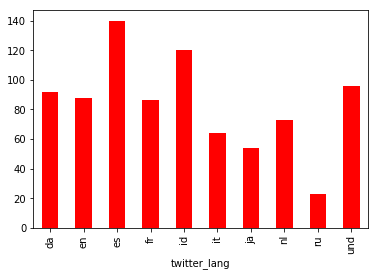

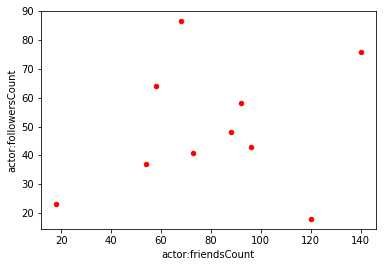

In [88]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_median['actor:followersCount'].plot(kind='bar', color='r')
lang_gb_median['actor:friendsCount'].plot(kind='bar',color='r')
lang_gb_median.plot(x='actor:friendsCount' , 
                    y='actor:followersCount',kind='scatter',color='r', marker='o')


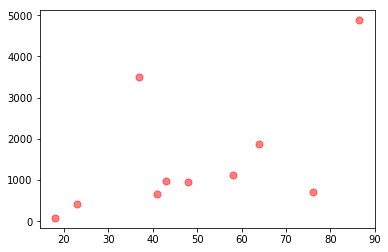

In [73]:
# more base matplotlib 
plt.scatter(x=lang_gb_median['actor:followersCount'],\
            y=lang_gb_median['actor:statusesCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe26752c110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe267123a90>]], dtype=object)

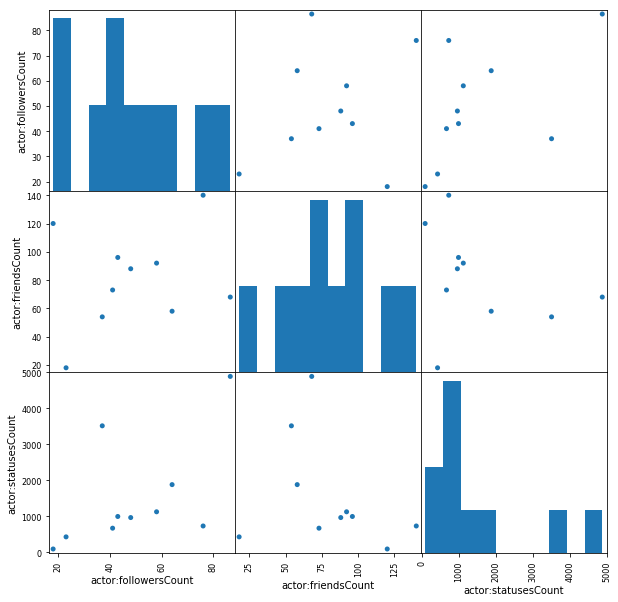

In [100]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lang_gb_median, alpha=1, figsize=(10,10), diagonal='hist', s=100)


Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [147]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(np.arange(1,5), index=pd.date_range('1/1/2000', periods=4), columns=list('T'))

df.head()

,T
2000-01-01,1
2000-01-02,2
2000-01-03,3
2000-01-04,4


In [148]:
df1 = df.cumsum()
df1.head()
df1.append(pd.DataFrame([1] , index=['2000-01-05'] , columns=list('T')))
 

,T
2000-01-01 00:00:00,1
2000-01-02 00:00:00,3
2000-01-03 00:00:00,6
2000-01-04 00:00:00,10
2000-01-05,1


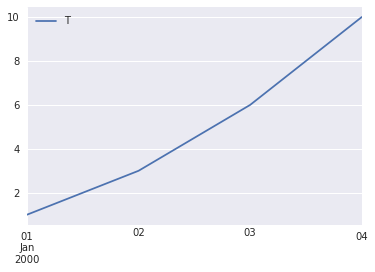

In [149]:
df1.plot()


(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

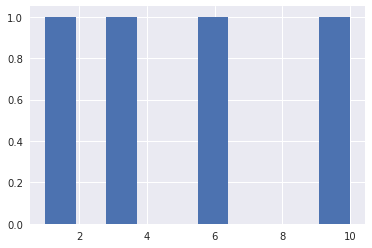

In [150]:
plt.hist(df1.values)

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe266197650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe265ff6750>]], dtype=object)

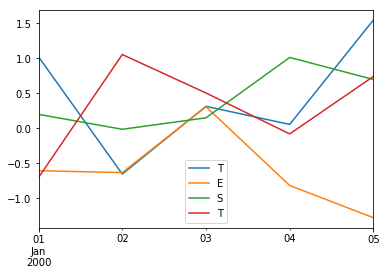

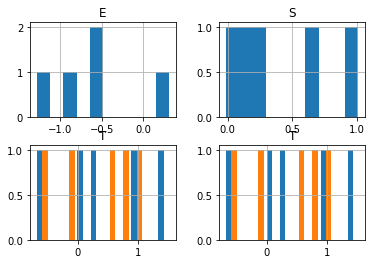

In [117]:
import prettyplotlib

df.plot()
df.hist()

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the :ref:`categorical plots <categorical_tutorial>` chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate distribution in seaborn is the ***`distplot` function. By default, this will draw a `histogram <https://en.wikipedia.org/wiki/Histogram>`_ and fit a `kernel density estimate <https://en.wikipedia.org/wiki/Kernel_density_estimation>`_ (KDE). 

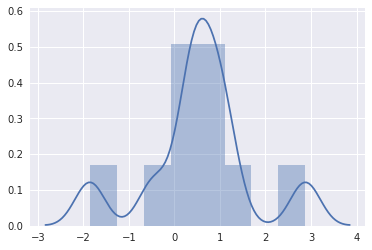

In [5]:
x = np.random.normal(size=10)
sns.distplot(x);

**Histograms**

Histograms are likely familiar, and a **``hist``** function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the **`rugplot`** function, but it is also available in **`distplot`**:

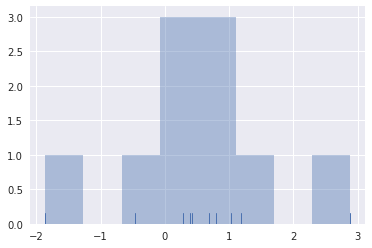

In [6]:
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. **`distplot`** uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

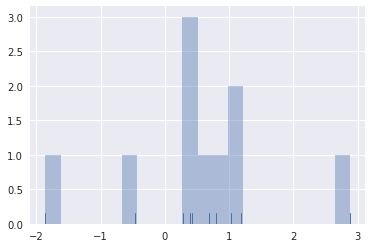

In [7]:
sns.distplot(x, bins=20, kde=False, rug=True);

**Kernel density estimaton**

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

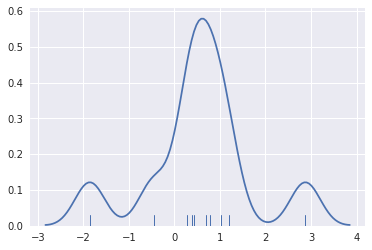

In [8]:
sns.distplot(x, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

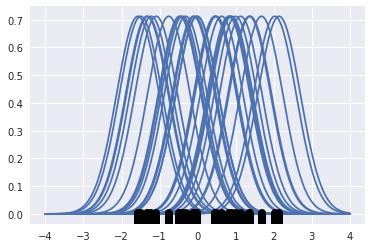

In [9]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="b")

sns.rugplot(x, color=".008", linewidth=8);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

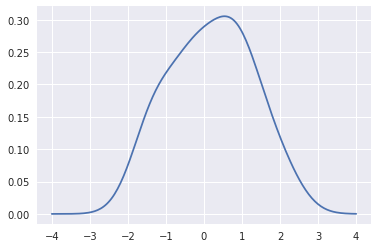

In [10]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the **`kdeplot`** function in seaborn, we get the same curve. This function is used by **`distplot`**, but it provides a more direct interface with easier access to other options when you just want the density estimate:

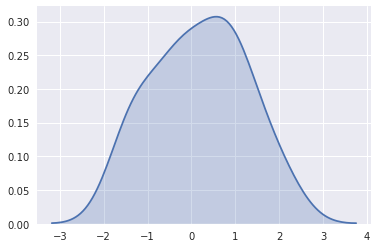

In [11]:
sns.kdeplot(x, shade=True);

The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

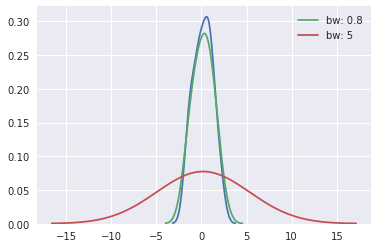

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.8, label="bw: 0.8")
sns.kdeplot(x, bw=5, label="bw: 5")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

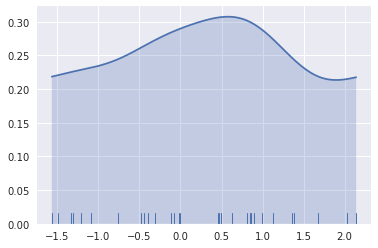

In [13]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

**Fitting parametric distributions**


You can also use **`distplot`** to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

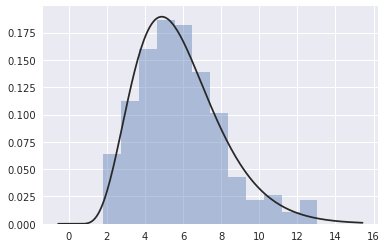

In [14]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the ***`jointplot` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [15]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [16]:
df

,x,y
0,1.195015,2.276675
1,-0.033347,1.559758
2,-1.048732,0.142264
3,0.779012,-0.425796
4,0.511587,1.283316
5,-0.468665,0.532411
6,1.670548,2.373402
7,0.350809,1.797497
8,-1.530054,1.072754
9,1.200954,2.649951


**Scatterplots**


The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib **``plt.scatter``** function, and it is also the default kind of plot shown by the **`jointplot`** function:

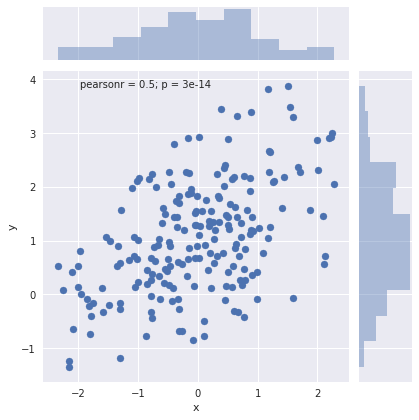

In [17]:
sns.jointplot(x="x", y="y", data=df);

**Hexbin plots**

The bivariate analogue of a histogram is known as a **"hexbin"** plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib **``plt.hexbin``** function and as a style in **`jointplot`**. It looks best with a white background:

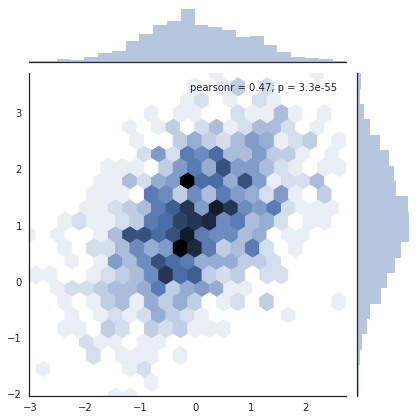

In [19]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="b");

**Kernel density estimation**


It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in **`jointplot`**:

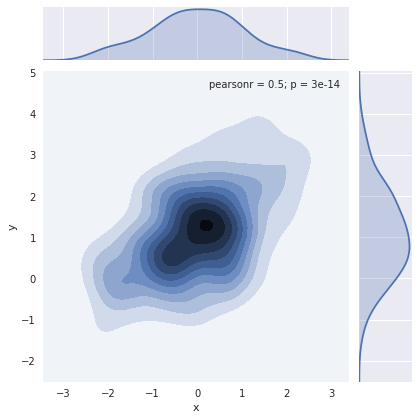

In [20]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

You can also draw a two-dimensional kernel density plot with the **`kdeplot`** function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the **`jointplot`** function manages its own figure:

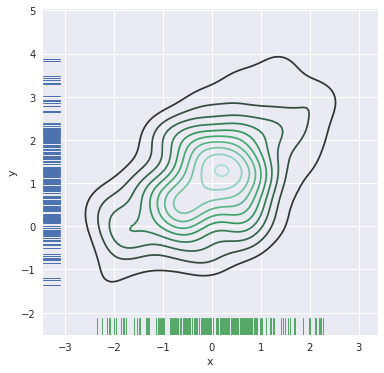

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

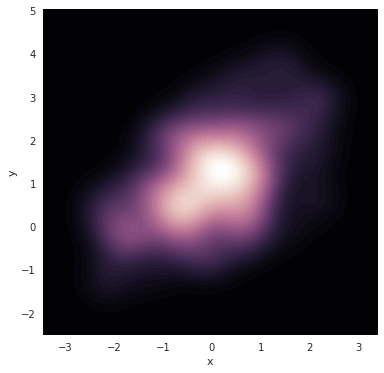

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The **`jointplot`** function uses a **`JointGrid`** to manage the figure. For more flexibility, you may want to draw your figure by using **`JointGrid`** directly. **`jointplot` returns the **`JointGrid`** object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

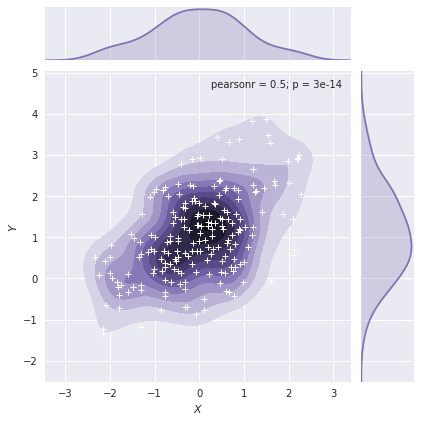

In [23]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can use the **`pairplot`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

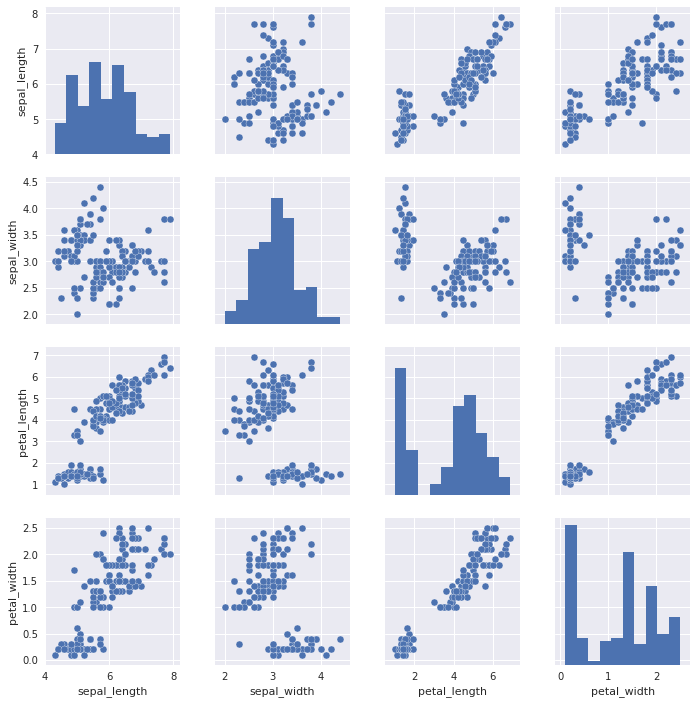

In [26]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between **`jointplot`** and **`JointGrid`**, the **`pairplot`** function is built on top of a **`PairGrid`** object, which can be used directly for more flexibility:

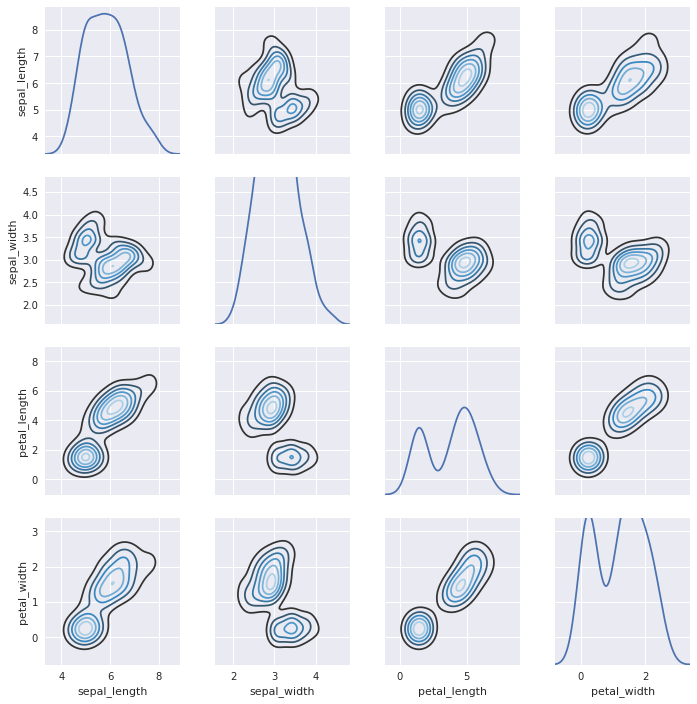

In [27]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships

In [28]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns
sns.set(color_codes=True)

In [31]:
np.random.seed(sum(map(ord, "regression")))

In [32]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, **`regplot`** and **`lmplot`** are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

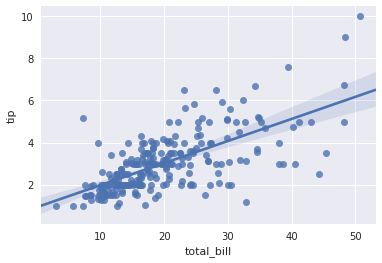

In [33]:
sns.regplot(x="total_bill", y="tip", data=tips);

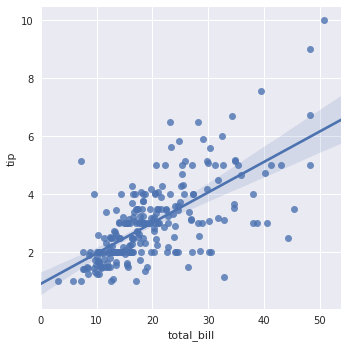

In [34]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that **`regplot`** accepts the ``x`` and ``y`` variables in a variety of formats including simple numpy arrays, pandas ``Series`` objects, or as references to variables in a pandas ``DataFrame`` object passed to ``data``. In contrast, **`lmplot`** has ``data`` as a required parameter and the ``x`` and ``y`` variables must be specified as strings. This data format is called "long-form" or `"tidy" <http://vita.had.co.nz/papers/tidy-data.pdf>`_ data. Other than this input flexibility, **`regplot`** possesses a subset of **`lmplot`**'s features, so we will demonstrate them using the latter.

It's possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

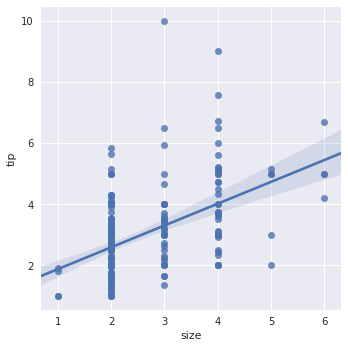

In [35]:
sns.lmplot(x="size", y="tip", data=tips);

One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

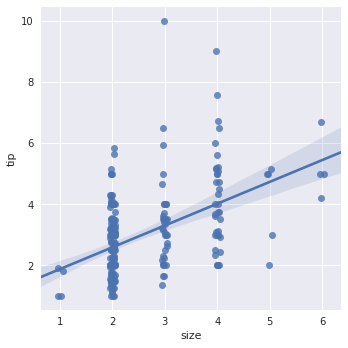

In [36]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

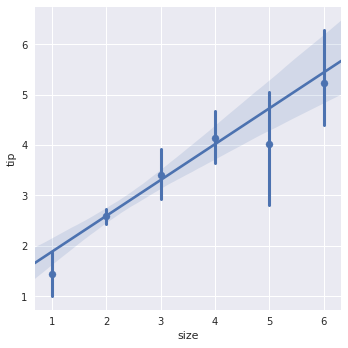

In [37]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>`_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [38]:
anscombe = sns.load_dataset("anscombe")

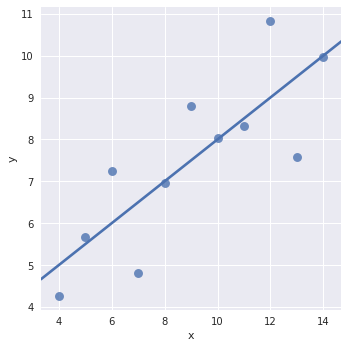

In [39]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

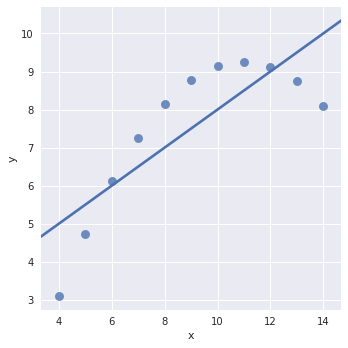

In [40]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, **`lmplot`** and **`regplot`** can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

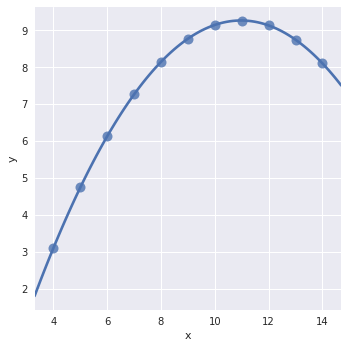

In [41]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 100});

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

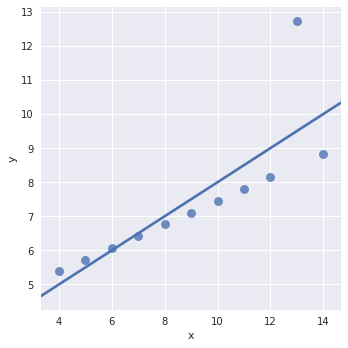

In [42]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

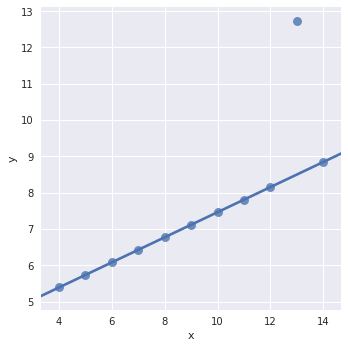

In [43]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

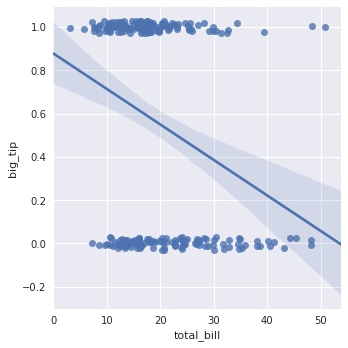

In [44]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

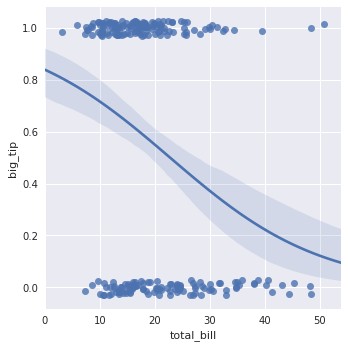

In [45]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ``ci=None``).

An altogether different approach is to fit a nonparametric regression using a `lowess smoother <https://en.wikipedia.org/wiki/Local_regression>`_. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

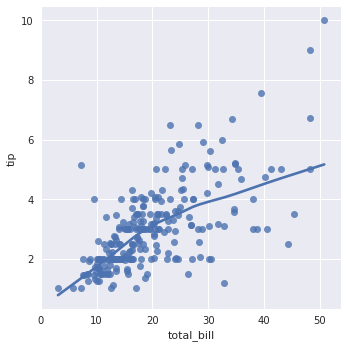

In [46]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

The **`residplot`** function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around ``y = 0``:

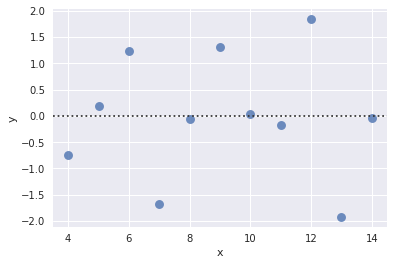

In [47]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

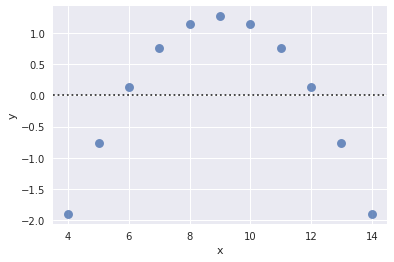

In [48]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

# Plotting with categorical data

We can use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship.

It's useful to divide seaborn's categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each *distribution* of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The first includes the functions **swarmplot** and **stripplot**, the second includes **boxplot** and **violinplot**, and the third includes **barplot** and **pointplot**. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between **regplot** and **lmplot**, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level **factorplot**, which combines these functions with a **FacetGrid** to apply a categorical plot across a grid of figure panels.


In [49]:
%matplotlib inline

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [52]:
np.random.seed(sum(map(ord, "categorical")))

In [53]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Categorical scatterplots
------------------------

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses ***`stripplot`, which generalizes a scatterplot to the case where one of the variables is categorical:

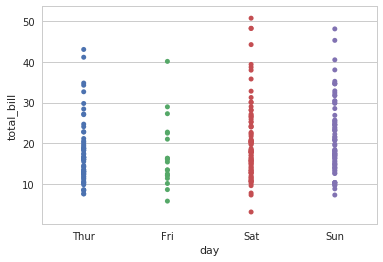

In [54]:
sns.stripplot(x="day", y="total_bill", data=tips);

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter": 

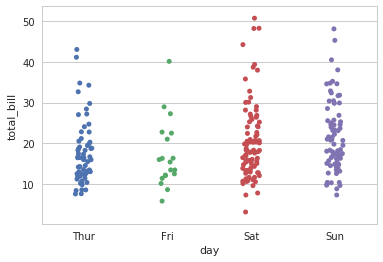

In [55]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

A different approach would be to use the function ***`swarmplot`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

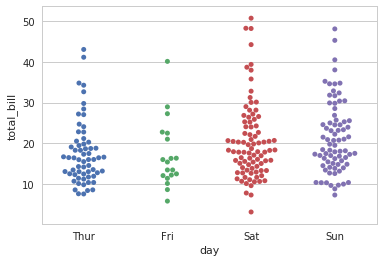

In [56]:
sns.swarmplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

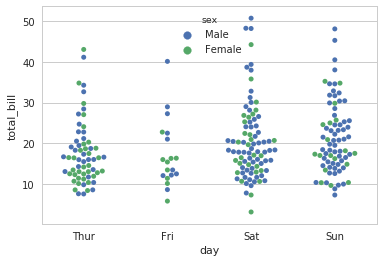

In [57]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas ``Categorical`` datatype, then the default order of the categories can be set there. For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted:

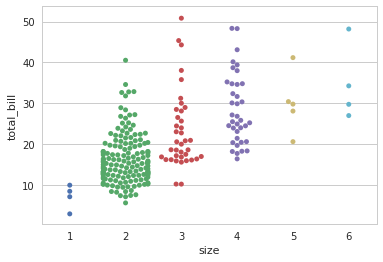

In [58]:
sns.swarmplot(x="size", y="total_bill", data=tips);

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). You can force an orientation using the ``orient`` keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to ``x`` and/or ``y``:

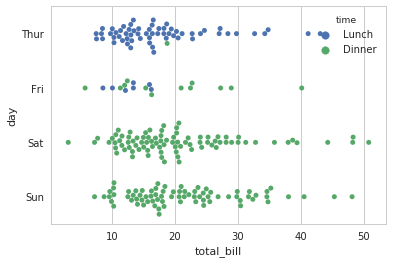

In [59]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

Distributions of observations within categories
-----------------------------------------------

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:`chapter <distribution_tutorial>` to the case where we want to quickly compare across several distributions.

Boxplots
^^^^^^^^

The first is the familiar ***`boxplot`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

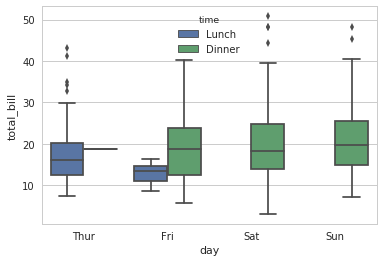

In [60]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

For boxplots, the assumption when using a ``hue`` variable is that it is nested within the ``x`` or ``y`` variable. This means that by default, the boxes for different levels of ``hue`` will be offset, as you can see above. If your ``hue`` variable is not nested, you can set the ``dodge`` parameter to disable offsetting:

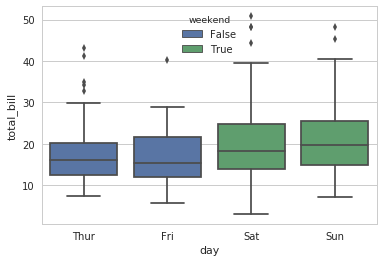

In [61]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

It can also be useful to combine ***`swarmplot` or ***`swarmplot` with ***`violinplot` or ***`boxplot` to show each observation along with a summary of the distribution:

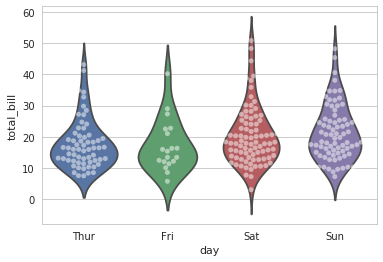

In [62]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);